# Per-Decision Final Experiments with Gamma=1.0
This time, we want to compare the final PDIS method with its vanilla-POIS counterpart, to be inserted in the paper. We need to optimize the delta parameter and compare on 20 runs for each of the standard environments presented in the original POIS paper.

In [25]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [26]:
runs = load_runs('../../../sacred_data/sacred_runs_master/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../../../sacred_data/sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))

Loaded runs: 572
Loaded final runs: 704


In [33]:
pdisnn_runs_local = load_runs('../sacred_pdisnn/')
print("Loaded pdisnn runs:", len(pdisnn_runs_local.keys()))

Loaded pdisnn runs: 453


In [34]:
# Merge the runs
total_runs = {}
for key, value in final_runs.items():
    total_runs[str(key) + '-final'] = value
for key, value in pdisnn_runs_local.items():
    total_runs[str(key) + '-local'] = value

In [35]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 1.0,
    'config.clipping': False,
    'config.natural': False,
    'config.policy': 'nn',
    'config.iw_norm': 'none'
}

## Cartpole - Linear Policy
We start by selecting the best delta parameter.

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 10, 109, 570, 904, 160
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 570, 10, 160, 109, 904
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 10, 109, 570, 160, 904
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 160, 570, 904, 10, 109
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 160, 570, 109, 10, 904
----------------------------------------
Method: pdis  - Delta: 0.6
Experiments: 5
Seeds: 904, 160, 109, 570, 10
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 904, 10, 160, 109, 570
----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 904, 10, 570, 109, 160
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 1

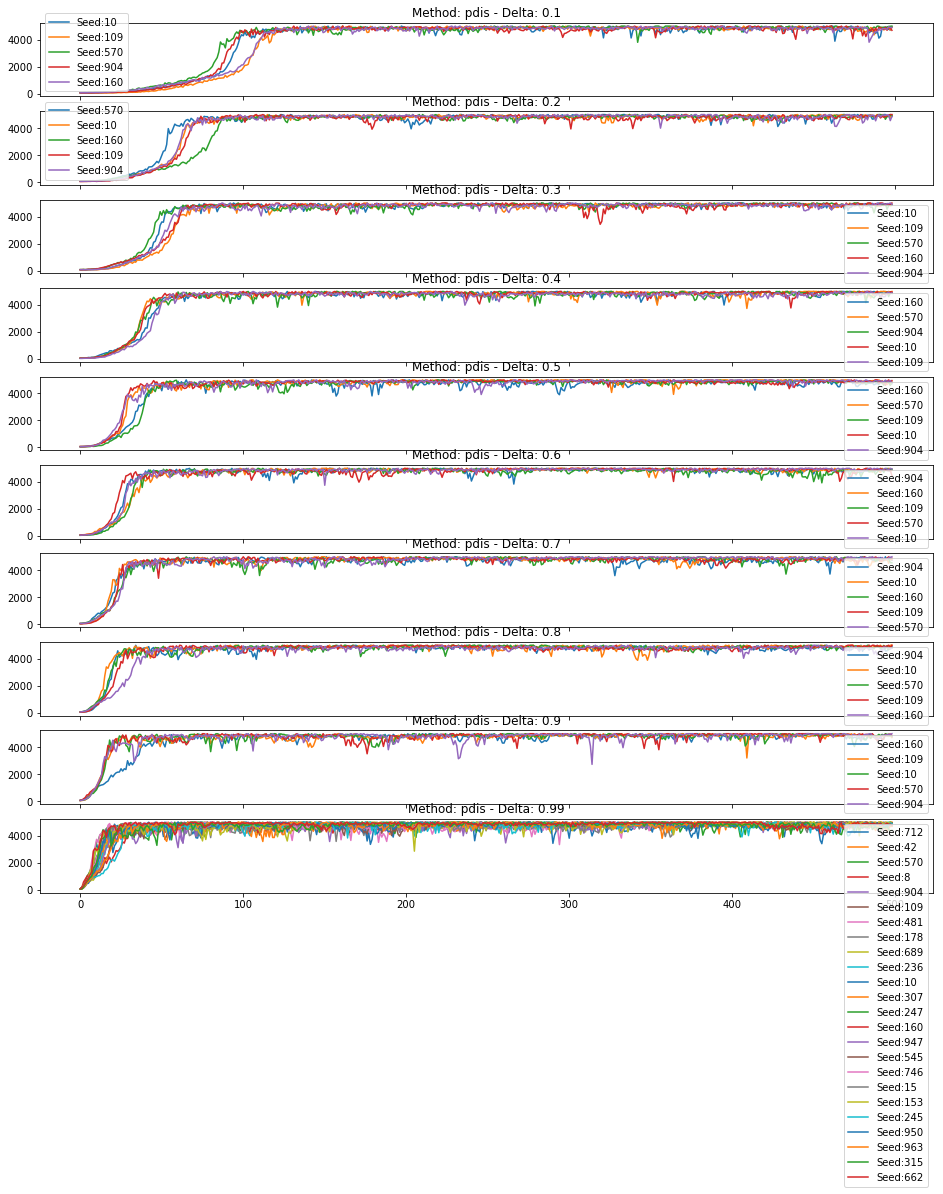

In [18]:
fig, axis = plt.subplots(nrows=10, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.6),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.8),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                            ]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
    filtered_runs = filter_runs({**base_query, **query}, pdisnn_runs_local)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

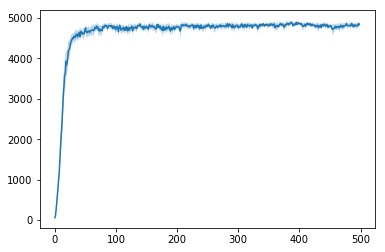

Seeds: 712, 42, 570, 8, 904, 109, 481, 178, 689, 236, 10, 307, 247, 160, 947, 545, 746, 15, 153, 245, 950, 963, 315, 662


In [19]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'pdis',
        'config.delta': 0.99,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

We can also evaluate the IS baseline, with the parameter as tuned in the paper.

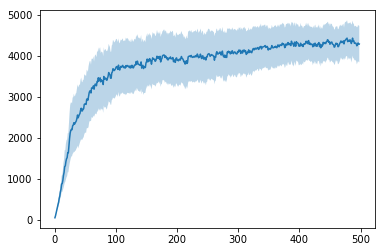

Seeds: 746, 15, 950, 545, 662, 315, 307, 8, 481, 245, 153, 42, 236, 963, 712, 689, 947, 247, 178, 100


In [20]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': 0.99,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Inverted Double Pendulum

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 570, 10, 160, 109, 904
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 109, 570, 904, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 10, 904, 109, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 10, 109, 160, 904, 570


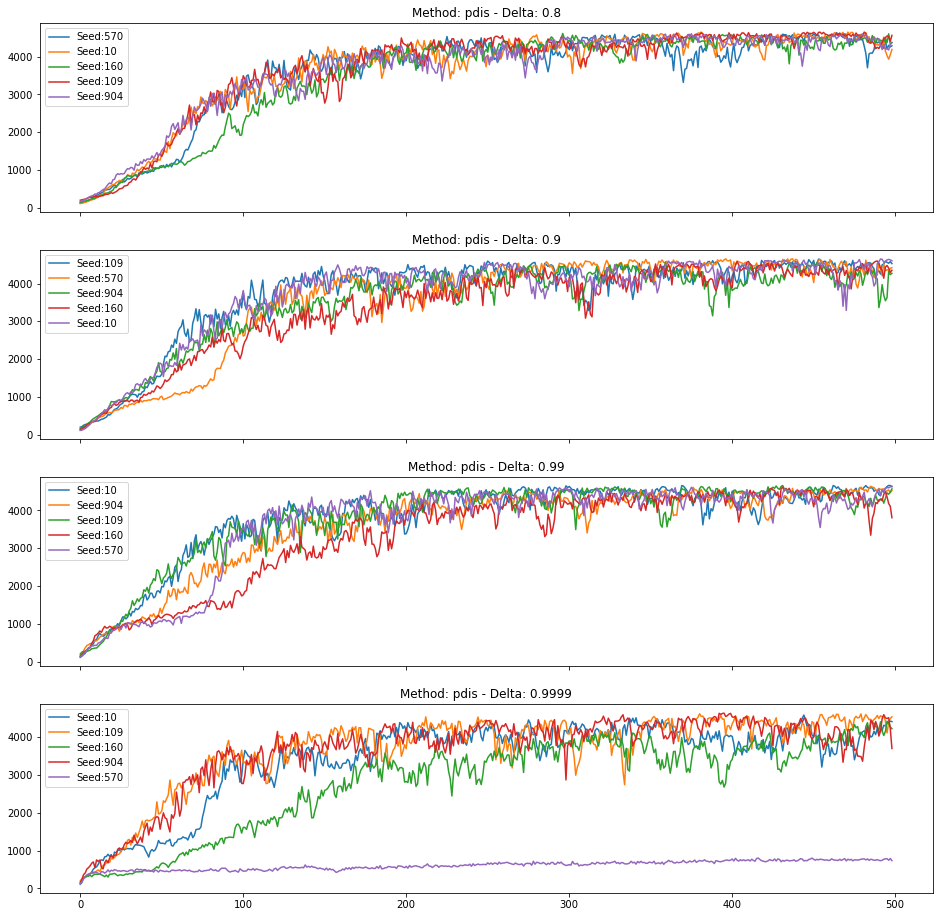

In [32]:
fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 0.9999)
                                            ]):
    query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

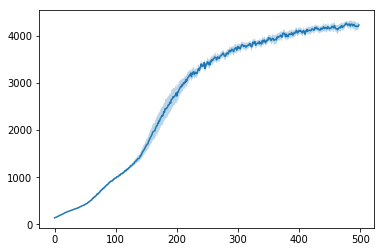

Seeds: 8, 307, 963, 481, 15, 904, 570, 10, 109, 160, 545, 247, 100, 236, 689, 245, 178, 947, 950, 42, 153, 746, 712, 662, 315


In [11]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.4,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

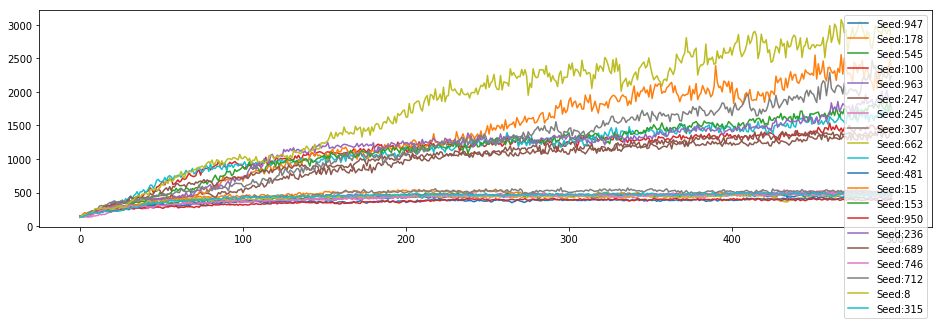

Seeds: 947, 178, 545, 100, 963, 247, 245, 307, 662, 42, 481, 15, 153, 950, 236, 689, 746, 712, 8, 315


In [12]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.1,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
plot_all(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Acrobot

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 904, 10, 109, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 10, 570, 109, 904, 160
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 904, 570, 109, 10, 160
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 24
Seeds: 153, 100, 8, 236, 712, 307, 662, 746, 904, 160, 109, 10, 570, 545, 315, 42, 481, 950, 247, 963, 15, 178, 947, 245
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 10, 109, 904, 570


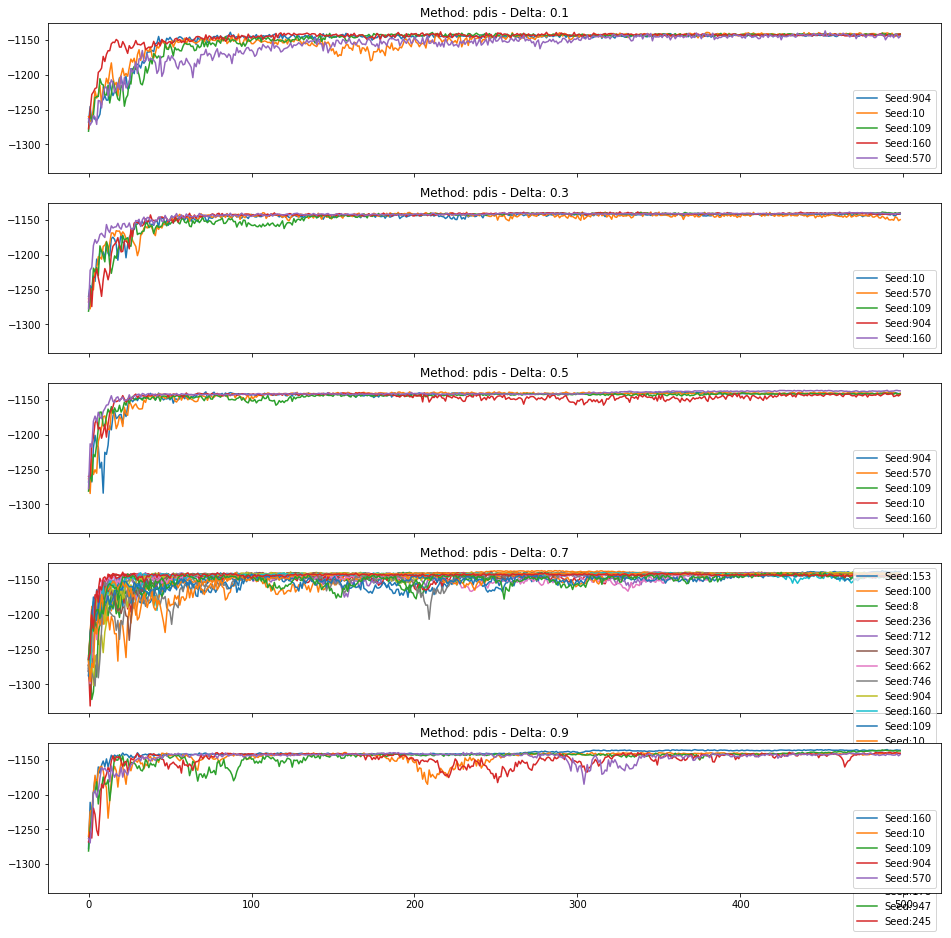

In [13]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9)
                                            ]):
    query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

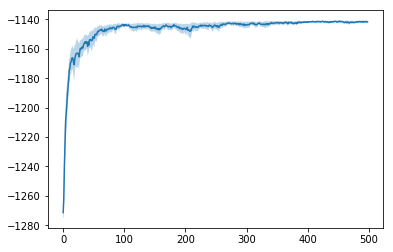

Seeds: 153, 100, 8, 236, 712, 307, 662, 746, 904, 160, 109, 10, 570, 545, 315, 42, 481, 950, 247, 963, 15, 178, 947, 245


In [14]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'pdis',
        'config.delta': 0.7,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

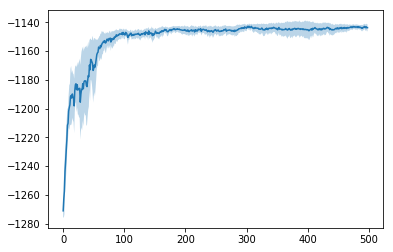

Seeds: 746, 315, 545, 947, 15, 8, 950, 689, 662, 245, 178, 247, 42, 100, 236, 963, 712, 307, 153, 481


In [15]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Mountain car

----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 160, 570, 109, 904, 10
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 904, 10, 109, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 25
Seeds: 178, 712, 8, 307, 904, 109, 10, 570, 160, 100, 153, 689, 746, 42, 481, 245, 247, 950, 236, 662, 315, 963, 545, 15, 947
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 10, 570, 160, 109, 904


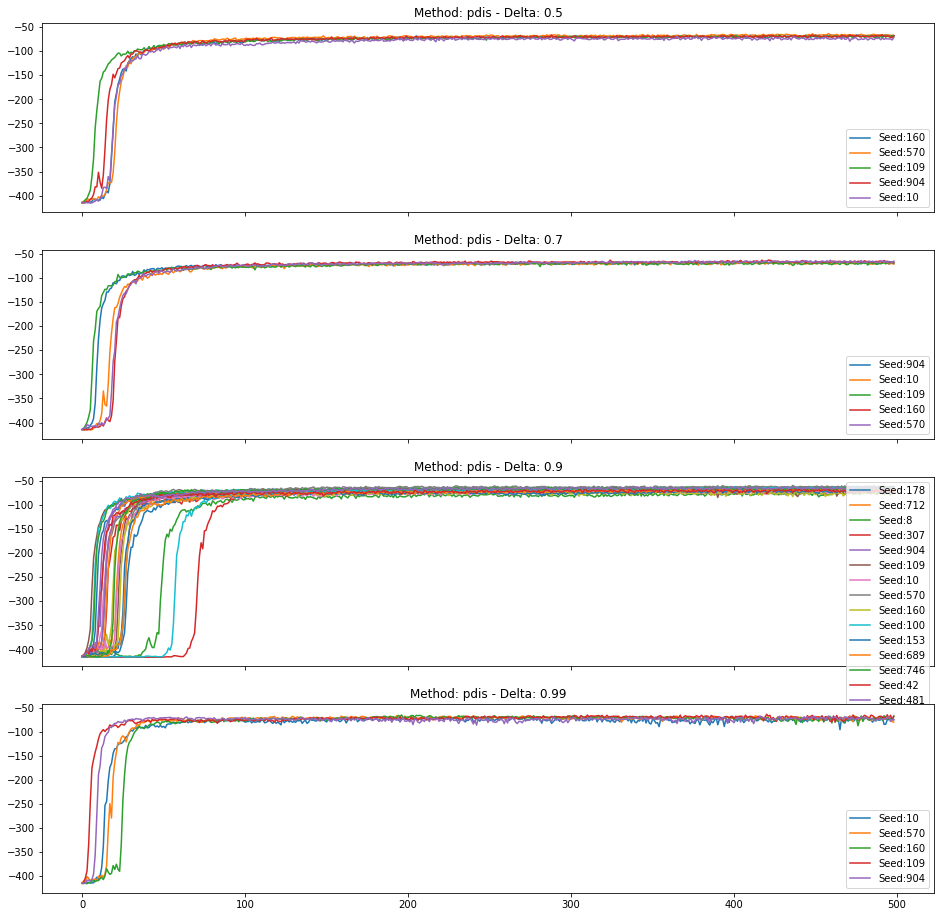

In [16]:
fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.5), 
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99)
                                            ]):
    query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

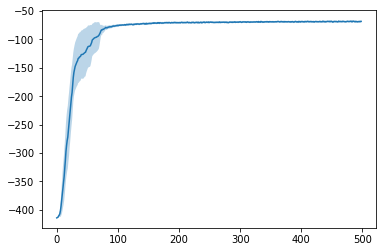

Seeds: 178, 712, 8, 307, 904, 109, 10, 570, 160, 100, 153, 689, 746, 42, 481, 245, 247, 950, 236, 662, 315, 963, 545, 15, 947


In [17]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'pdis',
        'config.delta': 0.9,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

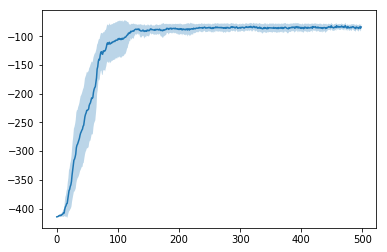

Seeds: 315, 545, 947, 245, 42, 481, 100, 8, 247, 963, 950, 662, 15, 746, 153, 307, 712, 236, 178, 689


In [18]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))